In [1]:
import torch 
from utils import *
from ArrayModel import *
import matplotlib.pyplot as plt

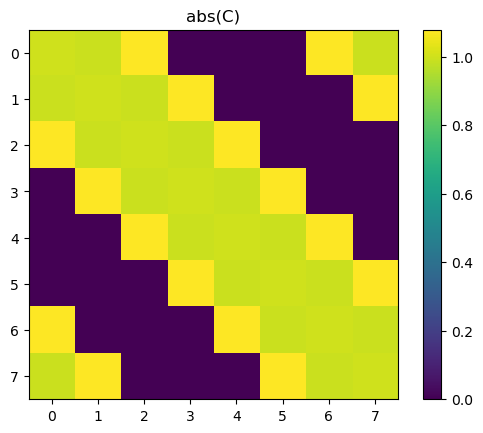

In [2]:
m = 8
t = 200
d = 3
snr = 20
mc_range = 3

lamda = 0.2
radius = 0.1

array = UCA(m=m, lamda=lamda)
array.build_sensor_positions(radius=radius)
array.build_array_manifold()
array.build_transform_matrices()

torch.manual_seed(30)
mc_coef = torch.zeros(5, dtype=torch.complex64)
mc_coef[:mc_range] = torch.rand(mc_range, dtype=torch.complex64)
C = build_symmetric_circulant_toeplitz(mc_coef)
C = C - torch.diag(torch.diag(C)) + torch.eye(m, dtype=torch.complex64)
torch.manual_seed(torch.seed())

plt.imshow(torch.abs(C)); 
plt.title('abs(C)');
plt.colorbar(); 
plt.show()

In [3]:

X, theta = generate_signal(t, d, snr, array, False, 0.1, -torch.pi/2+0.1, torch.pi/2-1, C)

torch.Size([360, 8, 3]) torch.Size([8, 5])


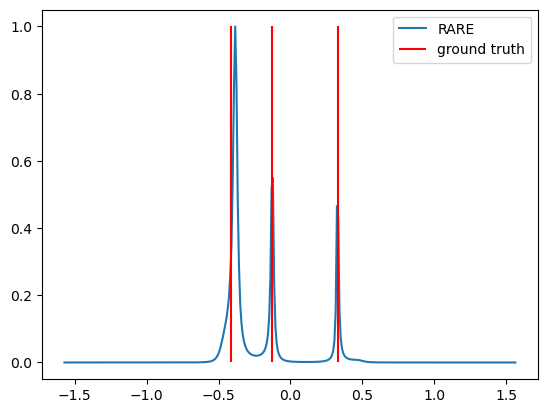

In [4]:
rare = RARE(d, mc_range, array, -torch.pi/2, torch.pi/2, 360)
_, spectrum_rare = rare.estimate(X)

plt.plot(array.angles_spectrum, spectrum_rare/torch.max(spectrum_rare), label='RARE')
plt.vlines(theta, 0, 1, colors='r', label='ground truth')
plt.legend()
plt.show()